In [170]:
import numpy as np
import matplotlib.pyplot as plt

In [253]:
def geneticAlgorithm(n, g, pR, pM, nCols): #Population Size, # of generations, P(reproduction), p(Mutation), # of queens
    population = np.array([np.random.permutation(nCols) for i in range(n)])
    bestIndividual, bestFitness = np.zeros(nCols), float('-inf')
    for individual in population:
        if (newFitness := fitness(individual)) > bestFitness:
            bestFitness = newFitness
            bestIndividual = individual
    for i in range(g):
        if bestFitness == nCols:
            return bestIndividual
        hasElite, worstFitness = False, 0
        for childIndex in range(n):
            pOne = population[tournamentSelection(population)]
            pTwo = population[tournamentSelection(population)]
            parents = np.array([pOne, pTwo])
            #parents = [rouletteSelection(population), rouletteSelection(population)]
            newChild = simplePermutationCrossover(pR, parents)
            #newChild = partiallyMappedCrossover(parents)
            newChild = mutation(pM, newChild)
            #newChild = heuristicMutation(pM, newChild)
            newFitness = fitness(newChild)
            if newFitness > bestFitness:
                betsFitness = newFitness
                bestIndividual = newChild
            if (newChild == bestIndividual).all():
                hasElite = True
            if newFitness < fitness(population[worstFitness]):
                worstFitness = childIndex
            population[childIndex] = newChild
        if not hasElite:
            population[worstFitness] = bestIndividual
    return bestIndividual

In [172]:
def fitness(solution):
    goodQueens = len(solution)
    for i in range(len(solution) - 1):
        for j in range(i + 1, len(solution)):
            queenOne, queenTwo = solution[i], solution[j]
            if abs(j - i) == abs(queenOne - queenTwo) or queenOne == queenTwo:
                goodQueens -= 1
    return goodQueens

In [173]:
def tournamentSelection(population, k = 2):
    participants = np.random.choice(len(population), k, False)
    results = [fitness(population[i]) for i in participants]
    return np.argmax(results)

In [174]:
def simplePermutationCrossover(pR, parents):
    nQueens = parents.shape[1]
    if np.random.rand() > pR:
        return parents[0] if fitness(parents[0]) > fitness(parents[1]) else parents[1]
    cuttingPoint = np.random.randint(1, len(parents[0]) - 2)
    child = np.concatenate((parents[0,: cuttingPoint], parents[1, cuttingPoint:]))
    setChild = set(child)
    repeated = set(parents[0,1: cuttingPoint]).intersection(set(parents[1, cuttingPoint: -1]))
    missing = set(np.arange(nQueens)).difference(setChild)
    if len(repeated):
        for i in range(len(child)):
            if child[i] in repeated:
                repeated.remove(child[i])
                child[i] = missing.pop()          
    return child 

In [254]:
def heuristicMutation(pM, individual):
    if np.random.rand() > pM:
        return individual
    for i in range(len(individual) - 1):
        for j in range(i + 1, len(individual)):
            queenOne, queenTwo = individual[i], individual[j]
            if abs(j - i) == abs(queenOne - queenTwo) or queenOne == queenTwo:
                individual[j] += 1
                individual[j] %= len(individual)
    return individual
def mutation(pM, individual):
    if np.random.rand() > pM:
        return individual
    toSwap = [np.random.choice(len(individual)), 0]
    for i in range(len(individual) - 1):
        for j in range(i + 1, len(individual)):
            queenOne, queenTwo = individual[i], individual[j]
            if abs(j - i) == abs(queenOne - queenTwo) or queenOne == queenTwo:
                toSwap[1] = j
    individual[toSwap[0]], individual[toSwap[1]] = individual[toSwap[1]], individual[toSwap[0]]
    return individual 

In [176]:
def plotSolution(individual):
    boardSize = len(individual)
    chessboard = np.zeros((boardSize, boardSize))

    chessboard[1::2, 0::2] = 1
    chessboard[0::2, 1::2] = 1

    plt.imshow(chessboard, cmap='binary')
    for i in range(len(individual)):
      plt.text(i, individual[i], '♕', fontsize=25, ha='center', va='center', color='black' if (i - individual[i] ) % 2 == 0 else 'white')
    plt.show()

[3 7 2 4 6 0 5 5] 7


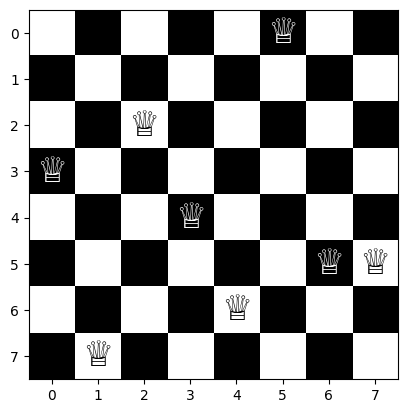

In [250]:
sol = geneticAlgorithm(10, 200, 0.5, 0.5, 8)
print(sol, fitness(sol))
plotSolution(sol)

#[3 7 4 2 0 6 1 5] 8

In [259]:
gotEight, avg, nIter = 0, 0.0, 30
for i in range(nIter):
    sol = geneticAlgorithm(30, 100, 0.8, 0.5, 8)
    avg += fitness(sol)
    if fitness(sol) == 8:
        gotEight += 1
    
print("Got:", gotEight, "out of:", nIter)
print("Fitness avg:", avg/nIter)

#04 de Septiembre 11:15 -> Got: 0 out of: 50. Fitness avg: 3.06 -> geneticAlgorithm(10, 200, 0.5, 0.5, 8)
#04 de Septiembre 11:34 -> Got: 24 out of: 50. Fitness avg: 6.8 -> geneticAlgorithm(30, 100, 0.5, 0.5, 8)

Got: 16 out of: 30
Fitness avg: 6.833333333333333
